In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

df_cleaned_drop_IF = df_cleaned_drop_IF 

### Data Cleaning: `df_cleaned_drop_IF`

- Dropped the following columns due to irrelevance or redundancy:
  - `from_airport_code`
  - `dest_airport_code`
  - `airline_number`
  - `flight_number`
  - `currency`
  - `co2_emissions`
  - `avg_co2_emission_for_this_route`
  - `co2_percentage`
  - `scan_date`

- Converted `departure_time` and `arrival_time` (e.g., `2022-05-02 16:00:00`, `2022-05-04 06:00:00`) into categorical time slots:
  - `Early_Morning`
  - `Morning`
  - `Afternoon`
  - `Evening`
  - `Night`

- IQR range value


In [67]:
# Drop specified columns
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=[
    'from_airport_code',
    'dest_airport_code',
    'airline_number',
    'flight_number',
    'currency',
    'co2_emissions',
    'avg_co2_emission_for_this_route',
    'co2_percentage',
    'scan_date'
])

# Convert duration from minutes to hours (assuming 'duration' is in minutes)
df_cleaned_drop_IF['duration'] = df_cleaned_drop_IF['duration'] / 60

In [68]:
import pandas as pd

# Define a function to convert hour to time of day
def time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early_Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert strings to datetime if necessary
df_cleaned_drop_IF['departure_time'] = pd.to_datetime(df_cleaned_drop_IF['departure_time'])
df_cleaned_drop_IF['arrival_time'] = pd.to_datetime(df_cleaned_drop_IF['arrival_time'])

# Apply the function to get time of day categories
df_cleaned_drop_IF['departure_time_of_day'] = df_cleaned_drop_IF['departure_time'].dt.hour.apply(time_of_day)
df_cleaned_drop_IF['arrival_time_of_day'] = df_cleaned_drop_IF['arrival_time'].dt.hour.apply(time_of_day)

# Drop the original datetime columns if no longer needed
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=['departure_time', 'arrival_time'])


In [69]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon
...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning


In [70]:
df_cleaned_drop_IF.columns

Index(['from_country', 'dest_country', 'aircraft_type', 'airline_name',
       'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day'],
      dtype='object')

In [71]:
#IQR range value
Q1 = df_cleaned_drop_IF['price'].quantile(0.2)
Q2 = df_cleaned_drop_IF['price'].quantile(0.4)
Q3 = df_cleaned_drop_IF['price'].quantile(0.6)
Q4 = df_cleaned_drop_IF['price'].quantile(0.8)

Q1, Q2, Q3, Q4

(513.0, 903.0, 1337.0, 2077.0)

In [72]:
df_cleaned_drop_IF[df_cleaned_drop_IF['price'] < Q1].shape[0], \
df_cleaned_drop_IF[(df_cleaned_drop_IF['price'] < Q2) & (df_cleaned_drop_IF['price'] > Q1)].shape[0], \
df_cleaned_drop_IF[(df_cleaned_drop_IF['price'] < Q3) & (df_cleaned_drop_IF['price'] > Q2)].shape[0], \
df_cleaned_drop_IF[(df_cleaned_drop_IF['price'] < Q4) & (df_cleaned_drop_IF['price'] > Q3)].shape[0], \
df_cleaned_drop_IF[df_cleaned_drop_IF['price'] > Q4].shape[0]

(19987, 19909, 19969, 19926, 19995)

### Feature Engineering

In [73]:
df_cleaned_drop_IF.shape

(99995, 9)

In [74]:
import category_encoders as ce

# Get object columns
cat_cols = df_cleaned_drop_IF.select_dtypes(include='object').columns

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_cleaned_drop_IF[cat_cols], df_cleaned_drop_IF['price'])

# Merge the encoded values back into the original DataFrame
df_cleaned_drop_IF = pd.concat([df_cleaned_drop_IF, df_encoded.add_suffix('_mean_encoded')], axis=1)


1. Smoothed Target Mean Encoding (Best for avoiding overfitting)
Instead of directly mapping each category to its mean price, smooth the mean using overall average to prevent overfitting — especially helpful when some categories have very few samples.

In [75]:
# def smooth_target_encoding(df, column, target, weight=100):
#     global_mean = df[target].mean()
#     agg = df.groupby(column)[target].agg(['mean', 'count'])
#     smoothing = (agg['count'] * agg['mean'] + weight * global_mean) / (agg['count'] + weight)
#     return df[column].map(smoothing)


In [76]:
# df_cleaned_drop_IF['departure_time_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'departure_time_of_day', 'price'
# )
# df_cleaned_drop_IF['arrival_time_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'arrival_time_of_day', 'price'
# )
# df_cleaned_drop_IF['from_country_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'from_country', 'price'
# )
# df_cleaned_drop_IF['dest_country_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'dest_country', 'price'
# )
# df_cleaned_drop_IF['airline_name_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'airline_name', 'price'
# )
# df_cleaned_drop_IF['aircraft_type_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'aircraft_type', 'price'
# )

In [77]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,from_country_mean_encoded,dest_country_mean_encoded,aircraft_type_mean_encoded,airline_name_mean_encoded,departure_time_of_day_mean_encoded,arrival_time_of_day_mean_encoded
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning,1185.855724,1345.239374,1503.565874,1294.999222,1425.517938,1524.139488
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon,1103.122350,2175.377926,2923.651056,2016.242734,1754.014809,1474.291837
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon,1744.178830,1364.076923,1340.538835,2230.962970,1425.517938,1474.291837
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning,2688.940989,1247.819551,2015.575145,2056.255609,1412.230429,1524.139488
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon,1185.855724,1998.498450,1295.225109,1230.751762,1317.187083,1474.291837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning,1057.748906,1446.229767,1426.091005,1526.011321,1425.517938,1342.282811
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning,1827.208654,1690.949425,1514.607636,2011.133641,1317.187083,1524.139488
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning,927.759627,1446.229767,1633.401392,1526.011321,1317.187083,1342.282811
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning,1827.208654,1690.949425,1528.935650,2443.660891,1425.517938,1524.139488


In [78]:
# Step 1: Clean and split the string into a list of airline names
airline_split = (
    df_cleaned_drop_IF['airline_name']
    .str.strip('[]')                      # remove brackets
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

# Step 2: Expand the list into 6 strings (pad with "None" as string)
airline_expanded = airline_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_cleaned_drop_IF[f'airline_{i+1}'] = airline_expanded.apply(lambda x: x[i])



In [79]:
aircraft_split = (
    df_cleaned_drop_IF['aircraft_type']
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

aircraft_expanded = aircraft_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_cleaned_drop_IF[f'aircraft_{i+1}'] = aircraft_expanded.apply(lambda x: x[i])
df_cleaned_drop_IF.drop(columns=['aircraft_type'], inplace=True)

In [80]:
df_cleaned_drop_IF[df_cleaned_drop_IF['stops'] == 5]

,from_country,dest_country,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,from_country_mean_encoded,dest_country_mean_encoded,...,airline_3,airline_4,airline_5,airline_6,aircraft_1,aircraft_2,aircraft_3,aircraft_4,aircraft_5,aircraft_6
64410,Canada,Netherlands,[Air Canada| AccesRail],13.316667,5,974.0,Evening,Afternoon,1185.855724,1137.7475,...,None,None,None,None,Airbus A330,Boeing 777,Train,Train,Train,Train


In [81]:
df_cleaned_drop_IF.drop(columns=['airline_name'], inplace=True)

In [82]:
# df_cleaned_drop_IF['airline_1_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'airline_1', 'price'
# )
# for i in range(6):
#     df_cleaned_drop_IF[f'airline_{i+1}_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, f'airline_{i+1}', 'price'
# )

### How Does the Ticket Price vary with the number of 'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'?

C:\Users\punna\AppData\Local\Temp\ipykernel_26084\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


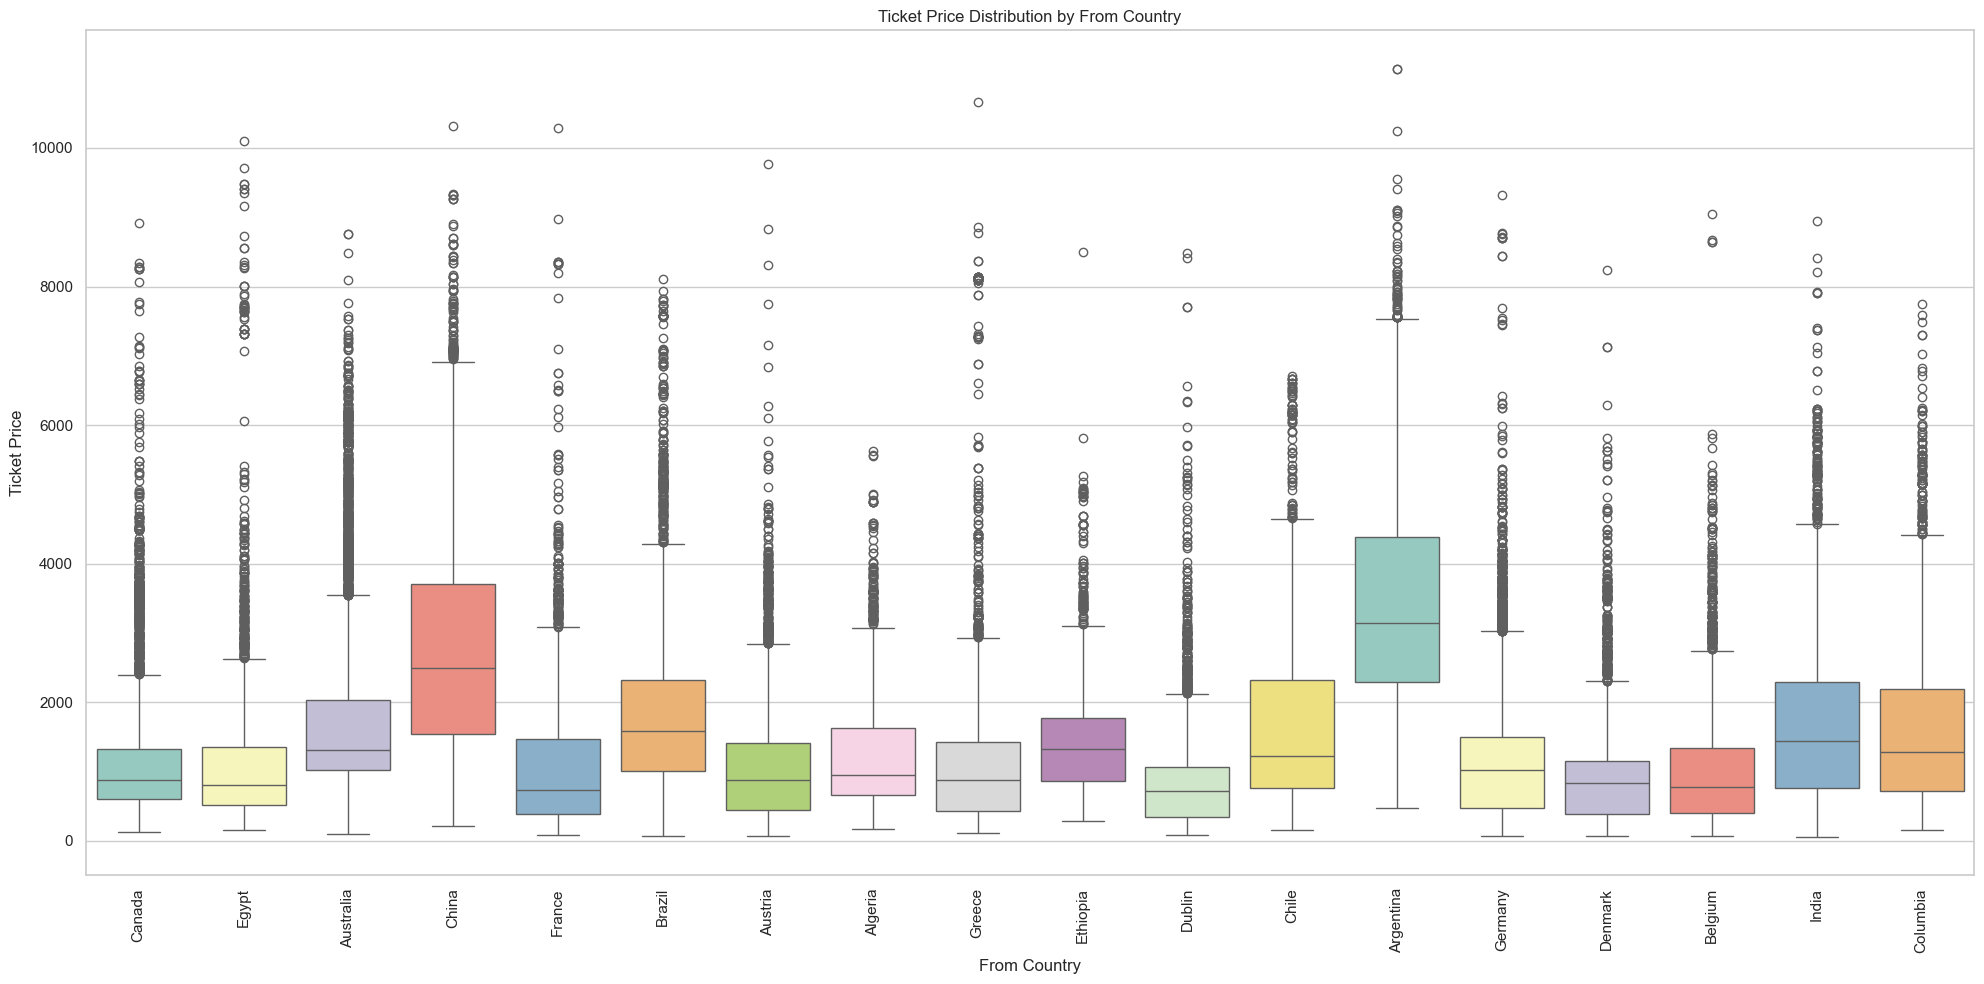

C:\Users\punna\AppData\Local\Temp\ipykernel_26084\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


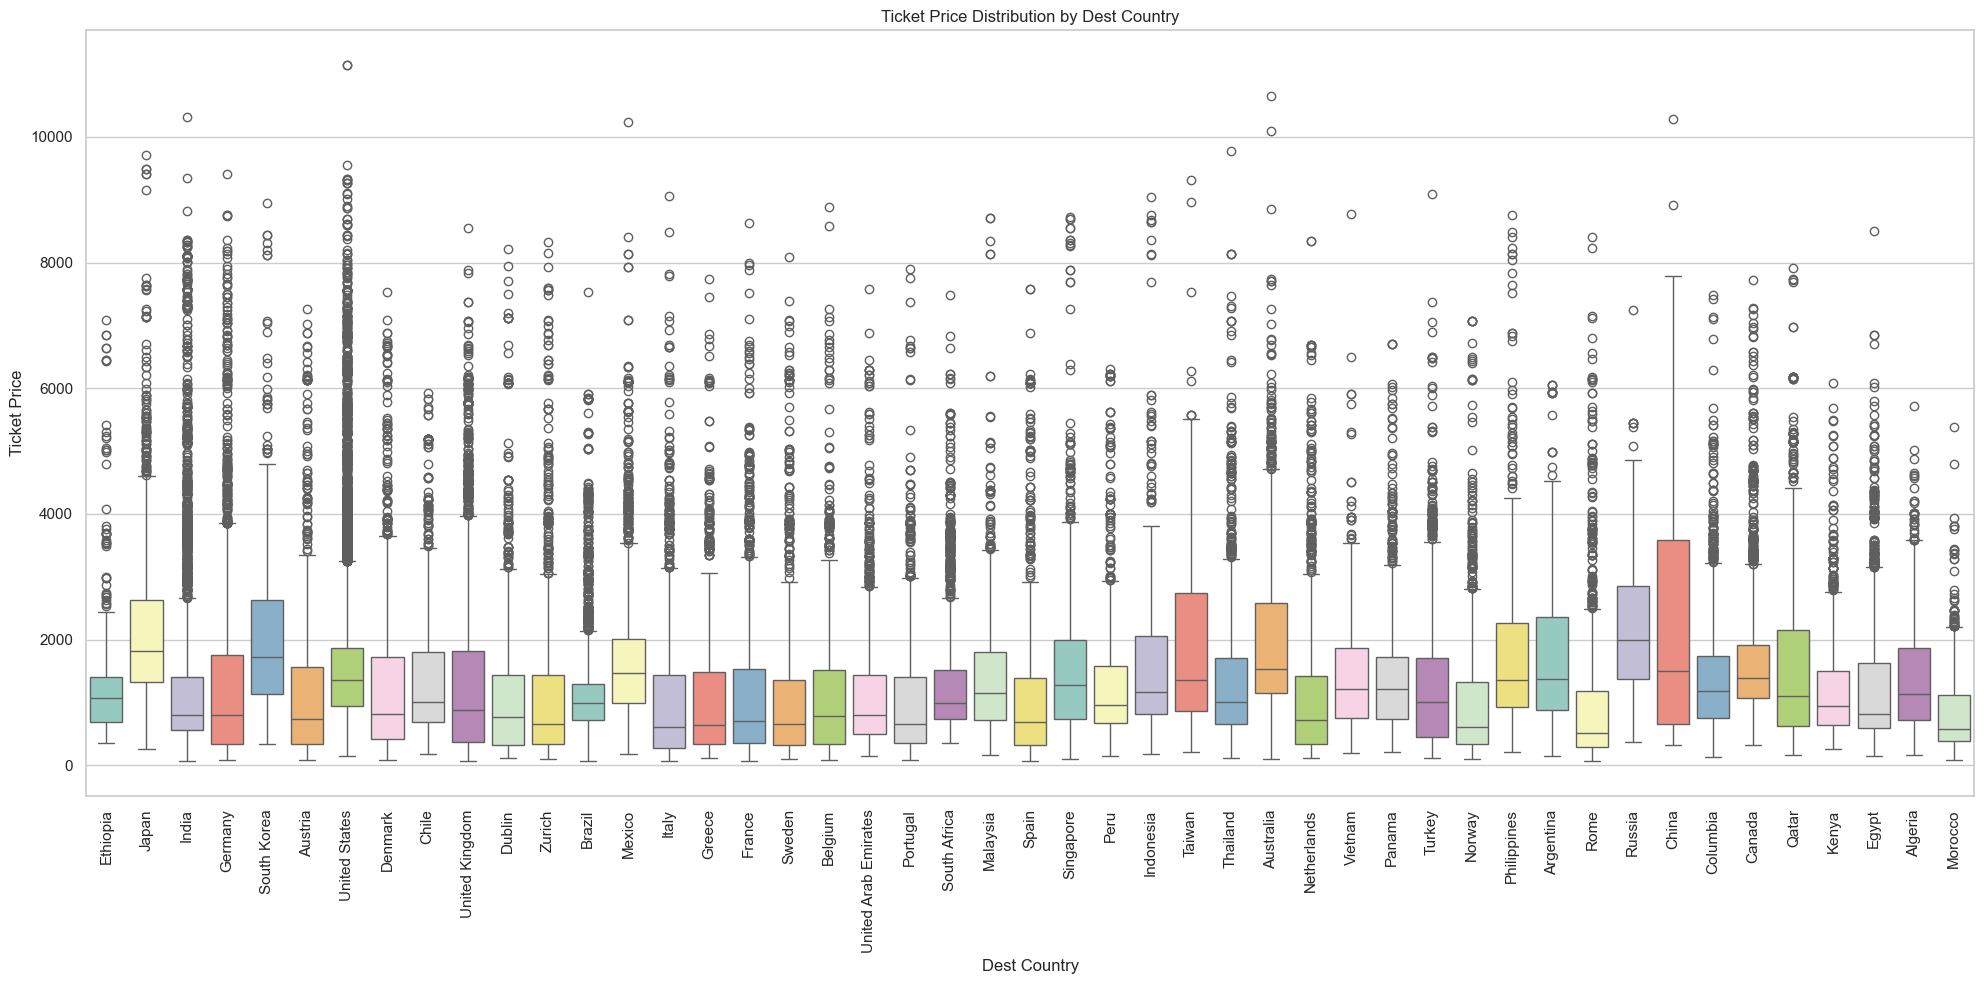

C:\Users\punna\AppData\Local\Temp\ipykernel_26084\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


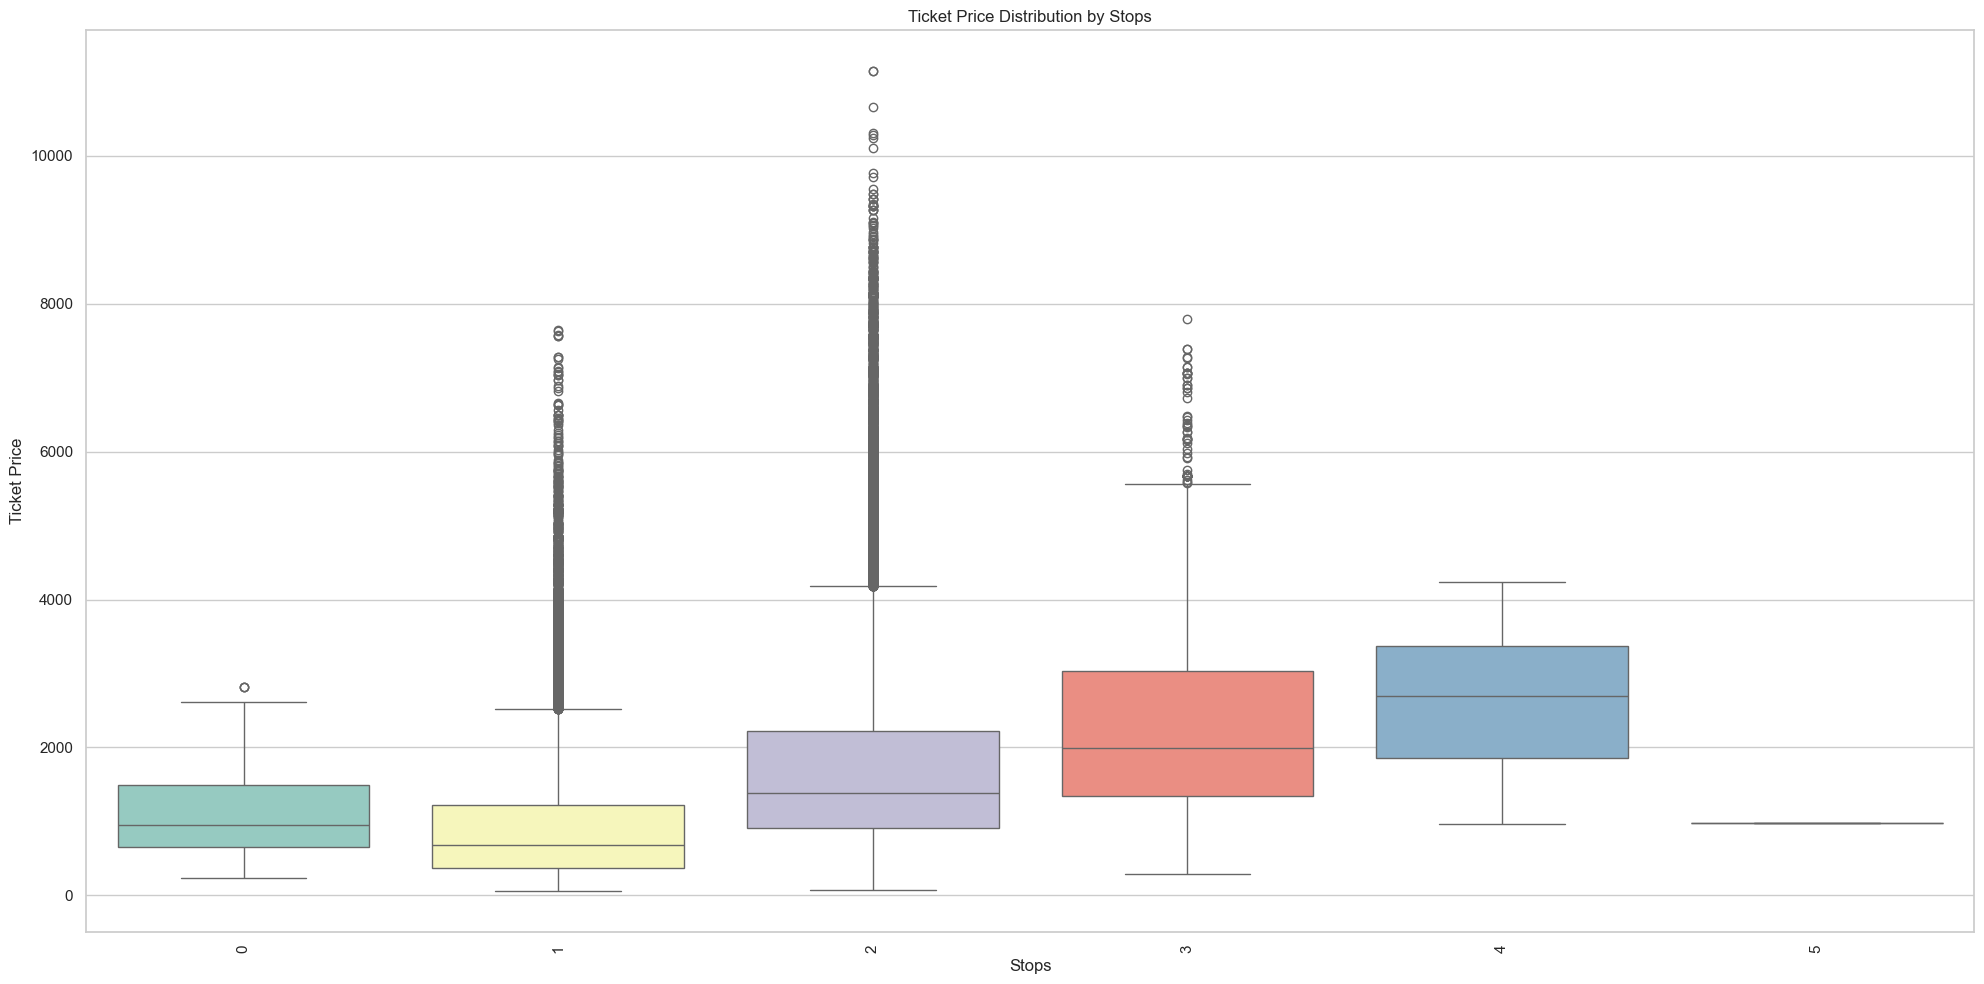

C:\Users\punna\AppData\Local\Temp\ipykernel_26084\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


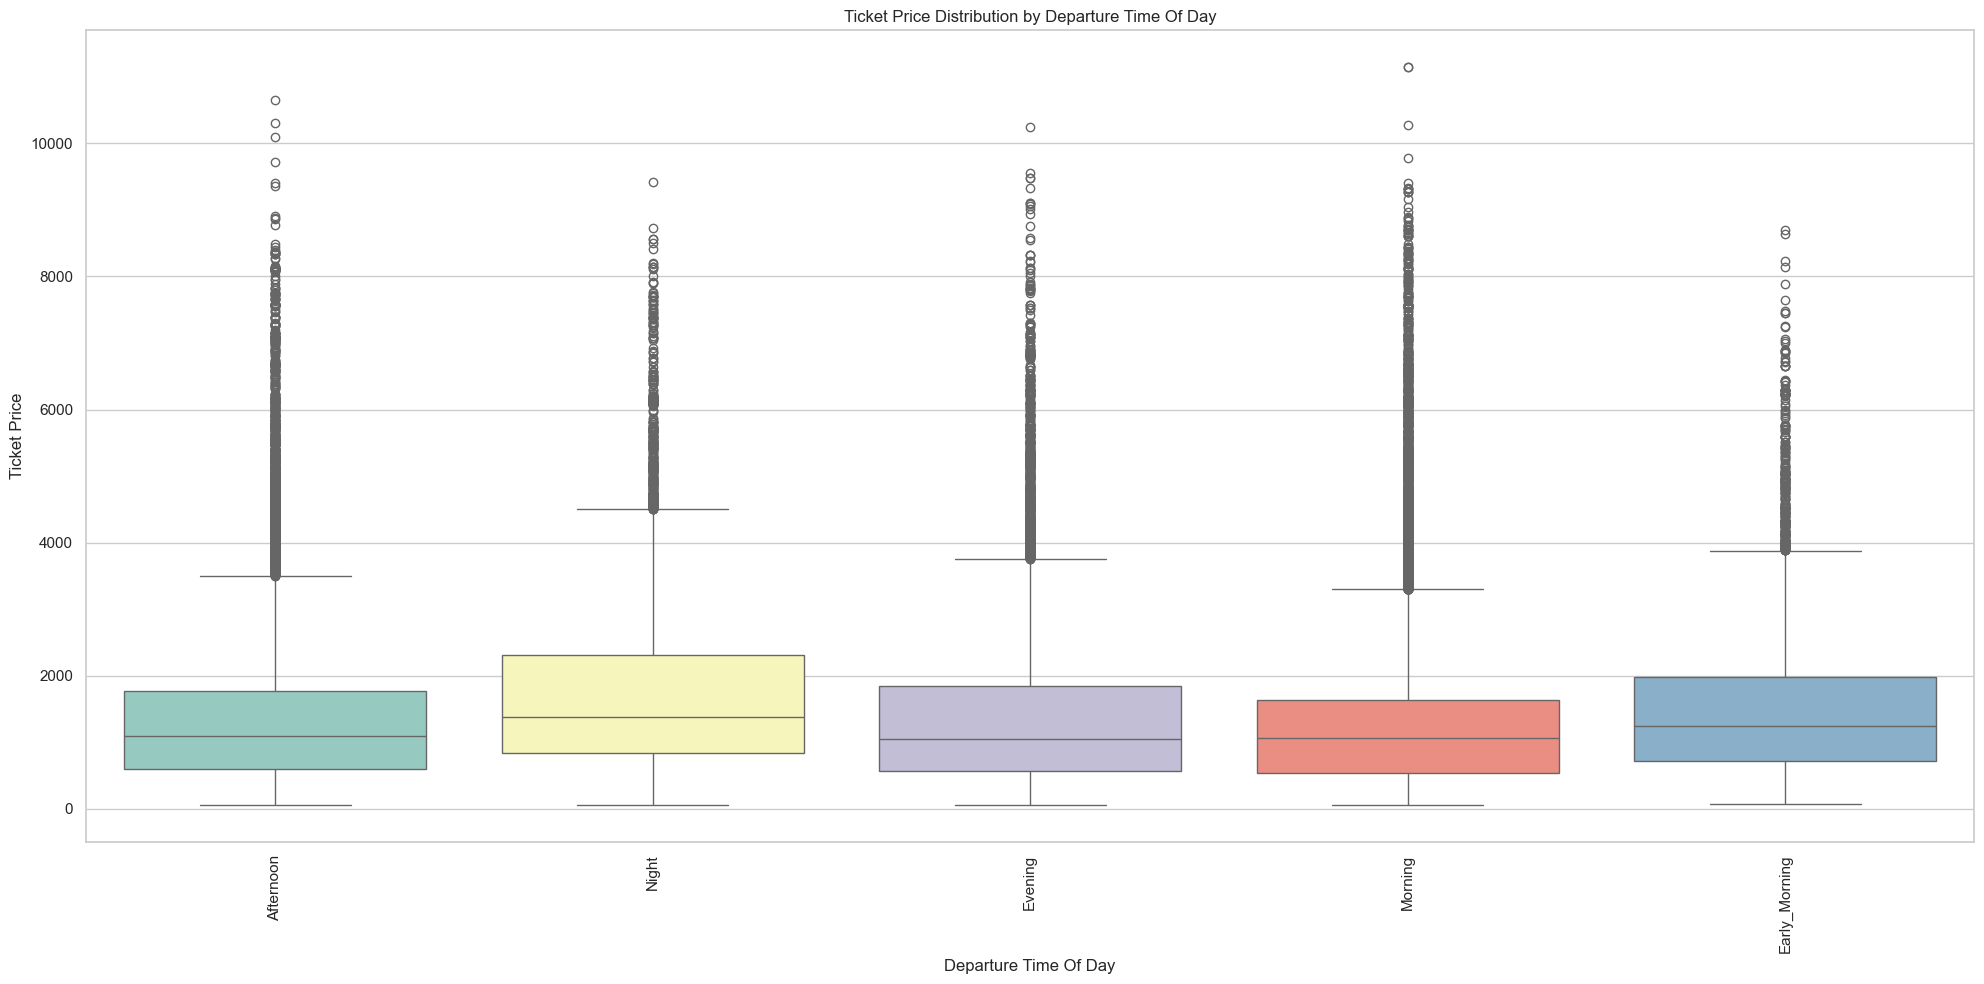

C:\Users\punna\AppData\Local\Temp\ipykernel_26084\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


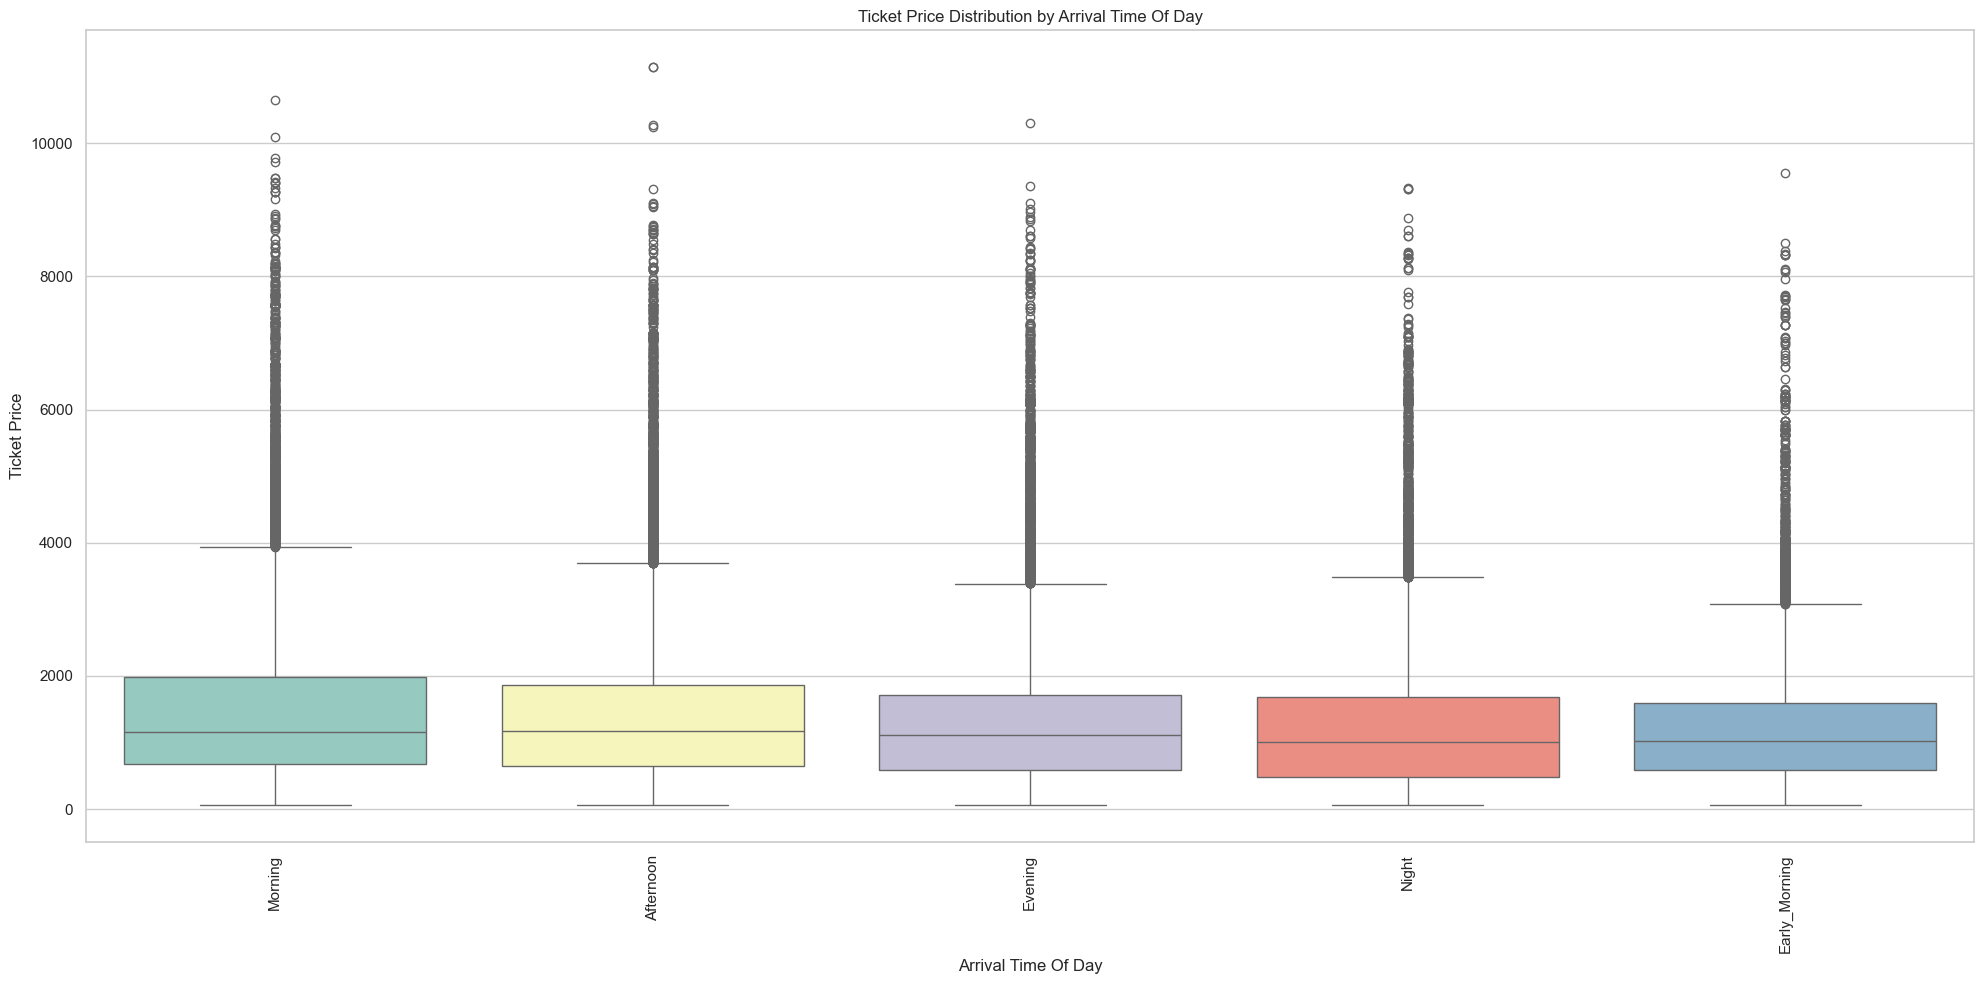

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot against price
categorical_cols = [
    'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'
]

# Plotting boxplots for each categorical feature vs. price
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')
    plt.xticks(rotation=90)
    plt.title(f'Ticket Price Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Ticket Price')
    plt.tight_layout()
    plt.show()


### Model Linear Regression

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_cleaned_drop_IF.drop('price', axis=1)
y = df_cleaned_drop_IF['price']

# Select categorical columns to encode
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Create a column transformer to apply OneHotEncoder to categorical columns only
column_transformer = ColumnTransformer(
    transformers=[('cat', ohe, categorical_cols)],
    remainder='passthrough'  # Keep the rest of the columns as is
)

X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



### Train Test Split

### Trainning

R² Score: 0.5982
Mean Squared Error: 577757.2576


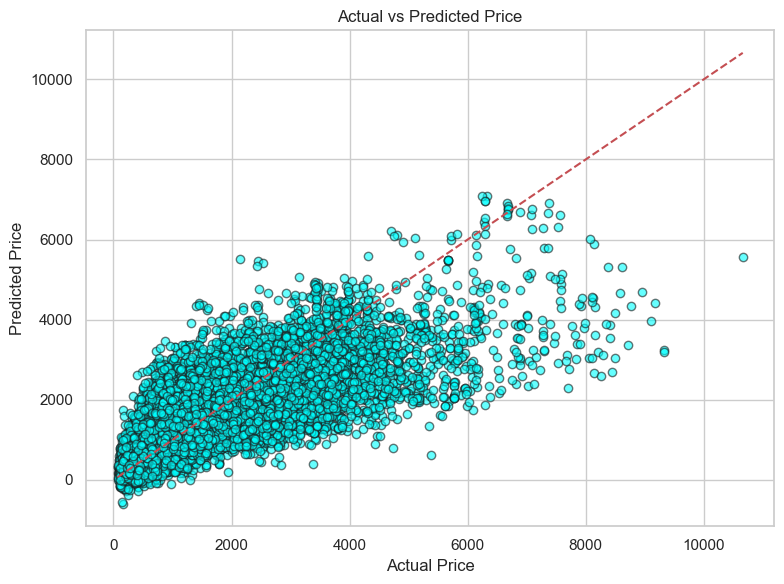

In [85]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values in selected columns

# Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

R² Score: 0.5843
Mean Squared Error: 597753.1334


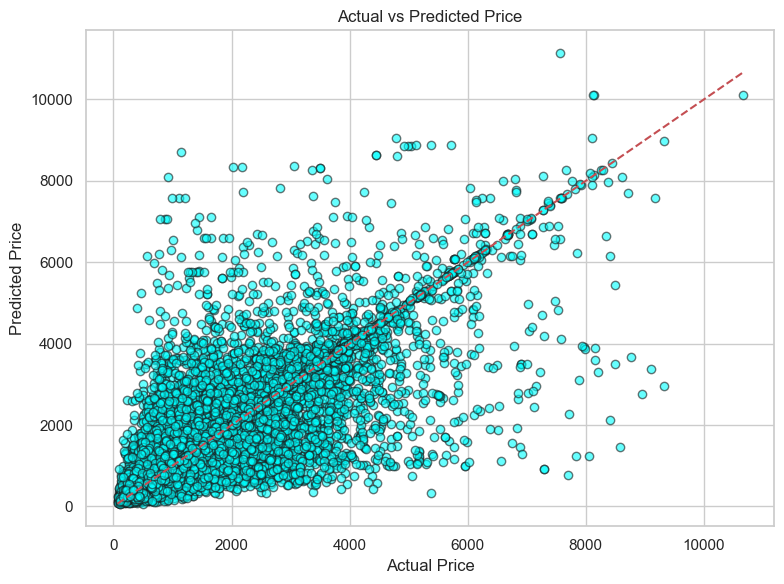

In [86]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.7281
Mean Squared Error: 390981.9172


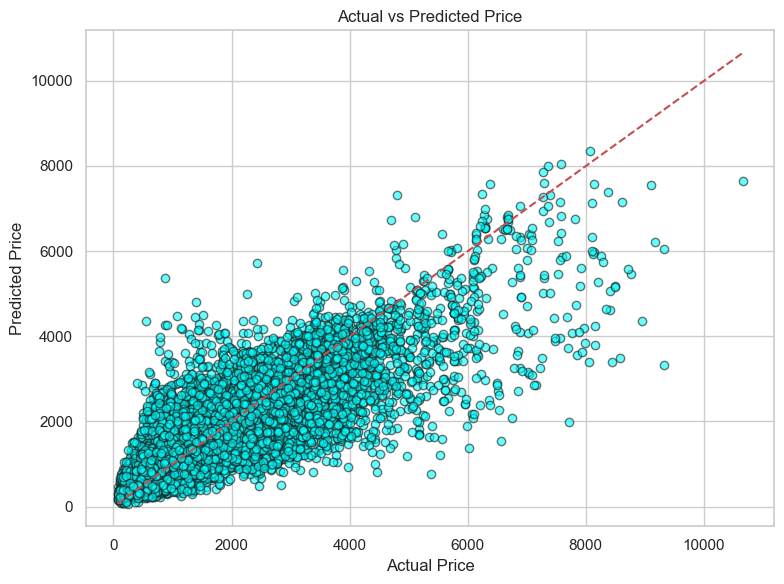

In [87]:
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the regression model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.6448
Mean Squared Error: 510794.9090


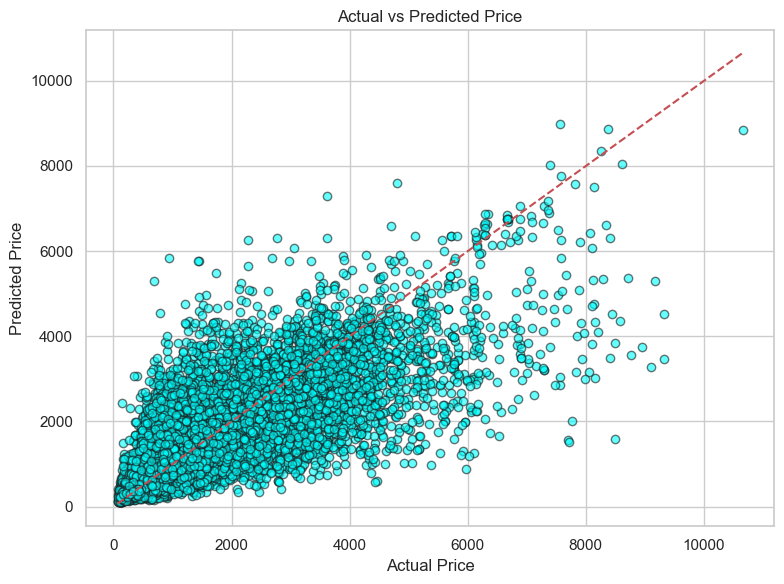

In [88]:
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.7629
Mean Squared Error: 340920.0358


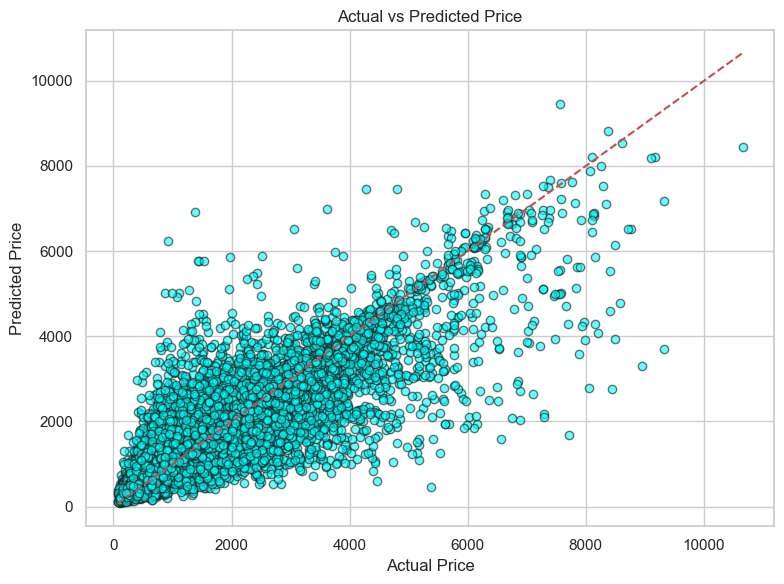

In [ ]:
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the regression model
model = BaggingRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\punna\anaconda3\Lib\site-packages\catboost\core.py", line 5873, in fit

Best Parameters: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
R² Score: 0.7605
Mean Squared Error: 344394.5243


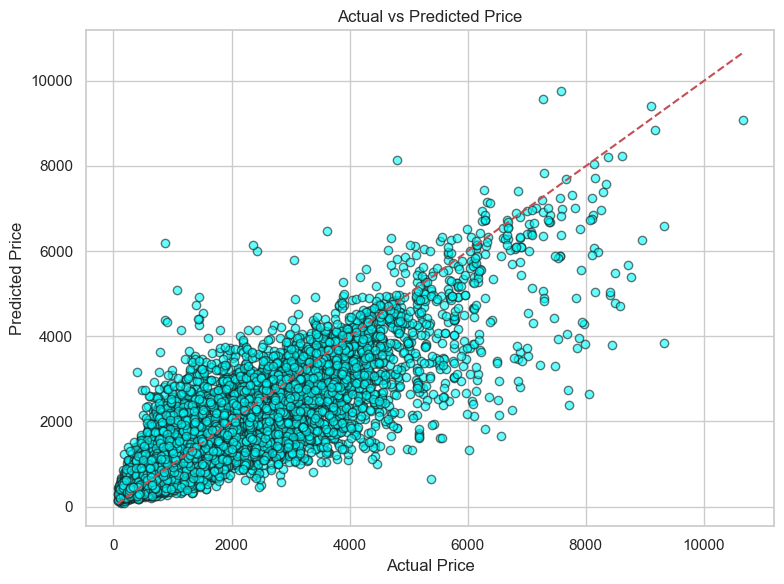

In [65]:
import numpy as np
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Assume X_encoded and y are already defined
X_encoded = X_encoded.astype(np.float32)  # Reduce memory usage

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature selection (keep top 500 features)
selector = SelectKBest(score_func=f_regression, k=500)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Define base model with controlled threading
model = CatBoostRegressor(loss_function='RMSE', verbose=0, thread_count=2)

# Define a manageable parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200, 500],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid Search with 3-fold CV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression:
- R²: 0.6683, MSE: 477012.2614
------------------------------
Decision Tree:
- R²: 0.6135, MSE: 555816.0119
------------------------------
XGBoost:
- R²: 0.7348, MSE: 381396.3664
------------------------------
KNN Regressor:
- R²: 0.6973, MSE: 435352.4234
------------------------------
Bagging Regressor:
- R²: 0.7604, MSE: 344507.3052
------------------------------
CatBoost:
- R²: 0.7505, MSE: 358763.1971
------------------------------


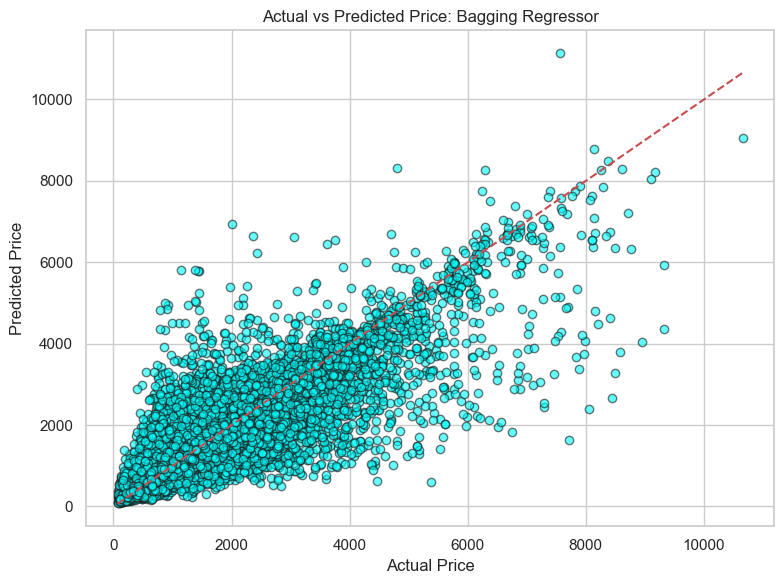

In [58]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns
# df = df.dropna(subset=['price'])  # adjust if needed

# # Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (r2, mse)
    print(f"{name}:")
    print(f"- R²: {r2:.4f}, MSE: {mse:.4f}")
    print("-" * 30)

# Plot: Actual vs Predicted for the best model (highest R²)
best_model_name = max(results, key=lambda k: results[k][0])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price: {best_model_name}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Create a copy of X_test to avoid modifying the original df
df_test = X_test.copy()

# Add actual and predicted prices
df_test['Actual Price'] = y_test.values
df_test['Predicted Price'] = y_pred_best

# Optional: see the head of the result
df_test.head(30)


,duration,stops,from_country_mean_encoded,dest_country_mean_encoded,aircraft_type_mean_encoded,airline_name_mean_encoded,departure_time_of_day_mean_encoded,arrival_time_of_day_mean_encoded,departure_time_smooth_encoded,arrival_time_smooth_encoded,...,airline_name_smooth_encoded,aircraft_type_smooth_encoded,airline_1_smooth_encoded,airline_2_smooth_encoded,airline_3_smooth_encoded,airline_4_smooth_encoded,airline_5_smooth_encoded,airline_6_smooth_encoded,Actual Price,Predicted Price
33967,35.666667,2,1744.178830,1137.747500,1440.277003,1539.590977,1317.187083,1474.291837,1317.467506,1474.101891,...,1492.568140,1430.582562,1777.311908,1395.971171,1357.103352,1424.728846,1425.7949,1425.7949,2020.0,1503.142971
31049,29.250000,2,1744.178830,1614.544444,1845.783834,2881.917793,1754.014809,1474.291837,1751.095222,1474.101891,...,1885.552556,1560.739920,1799.334199,1891.801778,1357.103352,1424.728846,1425.7949,1425.7949,4075.0,3295.149348
53746,9.083333,2,927.759627,1342.545095,1332.426584,648.339605,1317.187083,1474.291837,1317.467506,1474.101891,...,1158.314121,1408.189223,1058.778683,1464.550928,1357.103352,1424.728846,1425.7949,1425.7949,764.0,585.219501
9732,29.916667,1,1827.208654,1247.819551,1438.377751,1095.620072,1317.187083,1474.291837,1317.467506,1474.101891,...,1117.705344,1437.007070,2286.637976,877.373761,1357.103352,1424.728846,1425.7949,1425.7949,2249.0,1530.735067
7129,33.250000,2,1607.137168,1355.456243,1689.407003,1731.098573,1754.014809,1474.291837,1751.095222,1474.101891,...,1528.995363,1511.605610,1559.037240,1704.588525,2058.624161,1424.728846,1425.7949,1425.7949,2068.0,2905.309986
1402,25.166667,2,975.429413,1358.679309,1327.687383,1327.687383,1412.230429,1364.357012,1412.301514,1364.611182,...,1400.185619,1400.185619,1075.358617,1704.588525,1400.493399,1424.728846,1425.7949,1425.7949,888.0,784.033842
79015,28.250000,1,1137.446044,1441.319929,930.579923,863.870968,1412.230429,1364.357012,1412.301514,1364.611182,...,899.961137,1230.167622,1142.110148,877.373761,1357.103352,1424.728846,1425.7949,1425.7949,662.0,829.329303
9694,28.583333,3,1088.204228,1188.840104,1338.779016,1104.796597,1317.187083,1524.139488,1317.467506,1523.783360,...,1322.020080,1419.173168,1022.688925,1351.561591,1282.160310,1424.728846,1425.7949,1425.7949,757.0,694.754301
7126,24.183333,2,1137.446044,1441.319929,1421.053353,1365.909949,1317.187083,1342.282811,1317.467506,1343.477889,...,1369.964448,1424.262016,1111.034984,1891.801778,1357.103352,1424.728846,1425.7949,1425.7949,1162.0,1373.501171
41754,6.183333,1,1185.855724,1614.544444,374.227662,1230.751762,1425.517938,1308.616795,1425.519103,1309.340653,...,1244.916115,996.657678,1319.270481,877.373761,1357.103352,1424.728846,1425.7949,1425.7949,306.0,310.239146


### Hypertunning

In [60]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Define hyperparameter grids
param_grids = {
    # "Linear Regression": {},  # No tunable hyperparameters usually
    # "Decision Tree": {
    #     "max_depth": [None, 5, 10, 20],
    #     "min_samples_split": [2, 5, 10],
    #     "min_samples_leaf": [1, 2, 4]
    # },
    # "XGBoost": {
    #     "n_estimators": [100, 200, 300],
    #     "learning_rate": [0.01, 0.1, 0.2],
    #     "max_depth": [3, 5, 7],
    #     "subsample": [0.6, 0.8, 1.0]
    # },
    # "KNN Regressor": {
    #     "n_neighbors": [3, 5, 7, 9],
    #     "weights": ['uniform', 'distance']
    # },
    # "Bagging Regressor": {
    #     "n_estimators": [10, 50, 100],
    #     "max_samples": [0.5, 0.7, 1.0],
    #     "max_features": [0.5, 0.7, 1.0]
    # },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Models
base_models = {
    # "Linear Regression": LinearRegression(),
    # "Decision Tree": DecisionTreeRegressor(random_state=42),
    # "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    # "KNN Regressor": KNeighborsRegressor(),
    # "Bagging Regressor": BaggingRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)
}

# Store tuned models and results
best_models = {}
tuned_results = {}

# Tuning loop
for name, model in base_models.items():
    print(f"\nTuning: {name}")
    param_grid = param_grids[name]
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
    else:
        search = model  # No tuning for linear regression

    if isinstance(search, RandomizedSearchCV):
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        search.fit(X_train, y_train)
        best_model = search

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    best_models[name] = best_model
    tuned_results[name] = (r2, mse)

    print(f"{name} - Best R²: {r2:.4f}, Best MSE: {mse:.4f}")

# Plot best model
best_model_name = max(tuned_results, key=lambda k: tuned_results[k][0])
y_pred_best = best_models[best_model_name].predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price (Best Model: {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.show()



Tuning: CatBoost


MemoryError: Unable to allocate 1.78 GiB for an array with shape (53331, 4484) and data type float64